In [1]:
# importing the needed packages

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from sklearn.model_selection import cross_val_score

#feature engineering
from sklearn.feature_selection import mutual_info_classif

from imblearn.over_sampling import SMOTE
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Install CatBoost
!pip install catboost



In [3]:
# Install LightGBM
!pip install lightgbm

In [4]:
training_data = pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

In [5]:
training_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
training_data.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [7]:
training_data.shape

(165034, 14)

#Data Exploratory

In [8]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [9]:
training_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
training_data.dropna(inplace=True)

In [11]:
training_data.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:

training_data.duplicated().sum()

0

In [13]:
training_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,165034.0,NaN,NaN,NaN,82516.5,47641.3565,0.0,41258.25,82516.5,123774.75,165033.0
CustomerId,165034.0,NaN,NaN,NaN,15692005.019026,71397.816791,15565701.0,15633141.0,15690169.0,15756824.0,15815690.0
Surname,165034,2797,Hsia,2456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,165034.0,NaN,NaN,NaN,656.454373,80.10334,350.0,597.0,659.0,710.0,850.0
Geography,165034,3,France,94215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,165034,2,Male,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,165034.0,NaN,NaN,NaN,38.125888,8.867205,18.0,32.0,37.0,42.0,92.0
Tenure,165034.0,NaN,NaN,NaN,5.020353,2.806159,0.0,3.0,5.0,7.0,10.0
Balance,165034.0,NaN,NaN,NaN,55478.086689,62817.663278,0.0,0.0,0.0,119939.5175,250898.09
NumOfProducts,165034.0,NaN,NaN,NaN,1.554455,0.547154,1.0,1.0,2.0,2.0,4.0


In [14]:
training_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
training_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


##i found id,customerid,surname colomn are unnecessary so iwill drop them

In [16]:
training=training_data.drop(['id', 'CustomerId', 'Surname'],axis=1)

## There 're categorical and numerical data so i will sperate each of them

In [17]:
feature_list = [feature for feature in training.columns if not feature  == "Exited"]

categorical_features = [feature for feature in training.columns if
                        training[feature].dtype == "object"]
numerical_features = [feature for feature in training.columns if
                      feature not in categorical_features + ['Exited']]

discrete_features = ['HasCrCard', 'IsActiveMember','NumOfProducts']

continuous_features = list(set(numerical_features) - set(discrete_features))

#make sure no little feature left behind
assert feature_list.sort() == (categorical_features + numerical_features).sort()
assert numerical_features.sort() == (continuous_features + discrete_features).sort()

In [18]:
continuous_features_to_plot = ['Balance', 'EstimatedSalary', 'CreditScore', 'Tenure', 'Age']

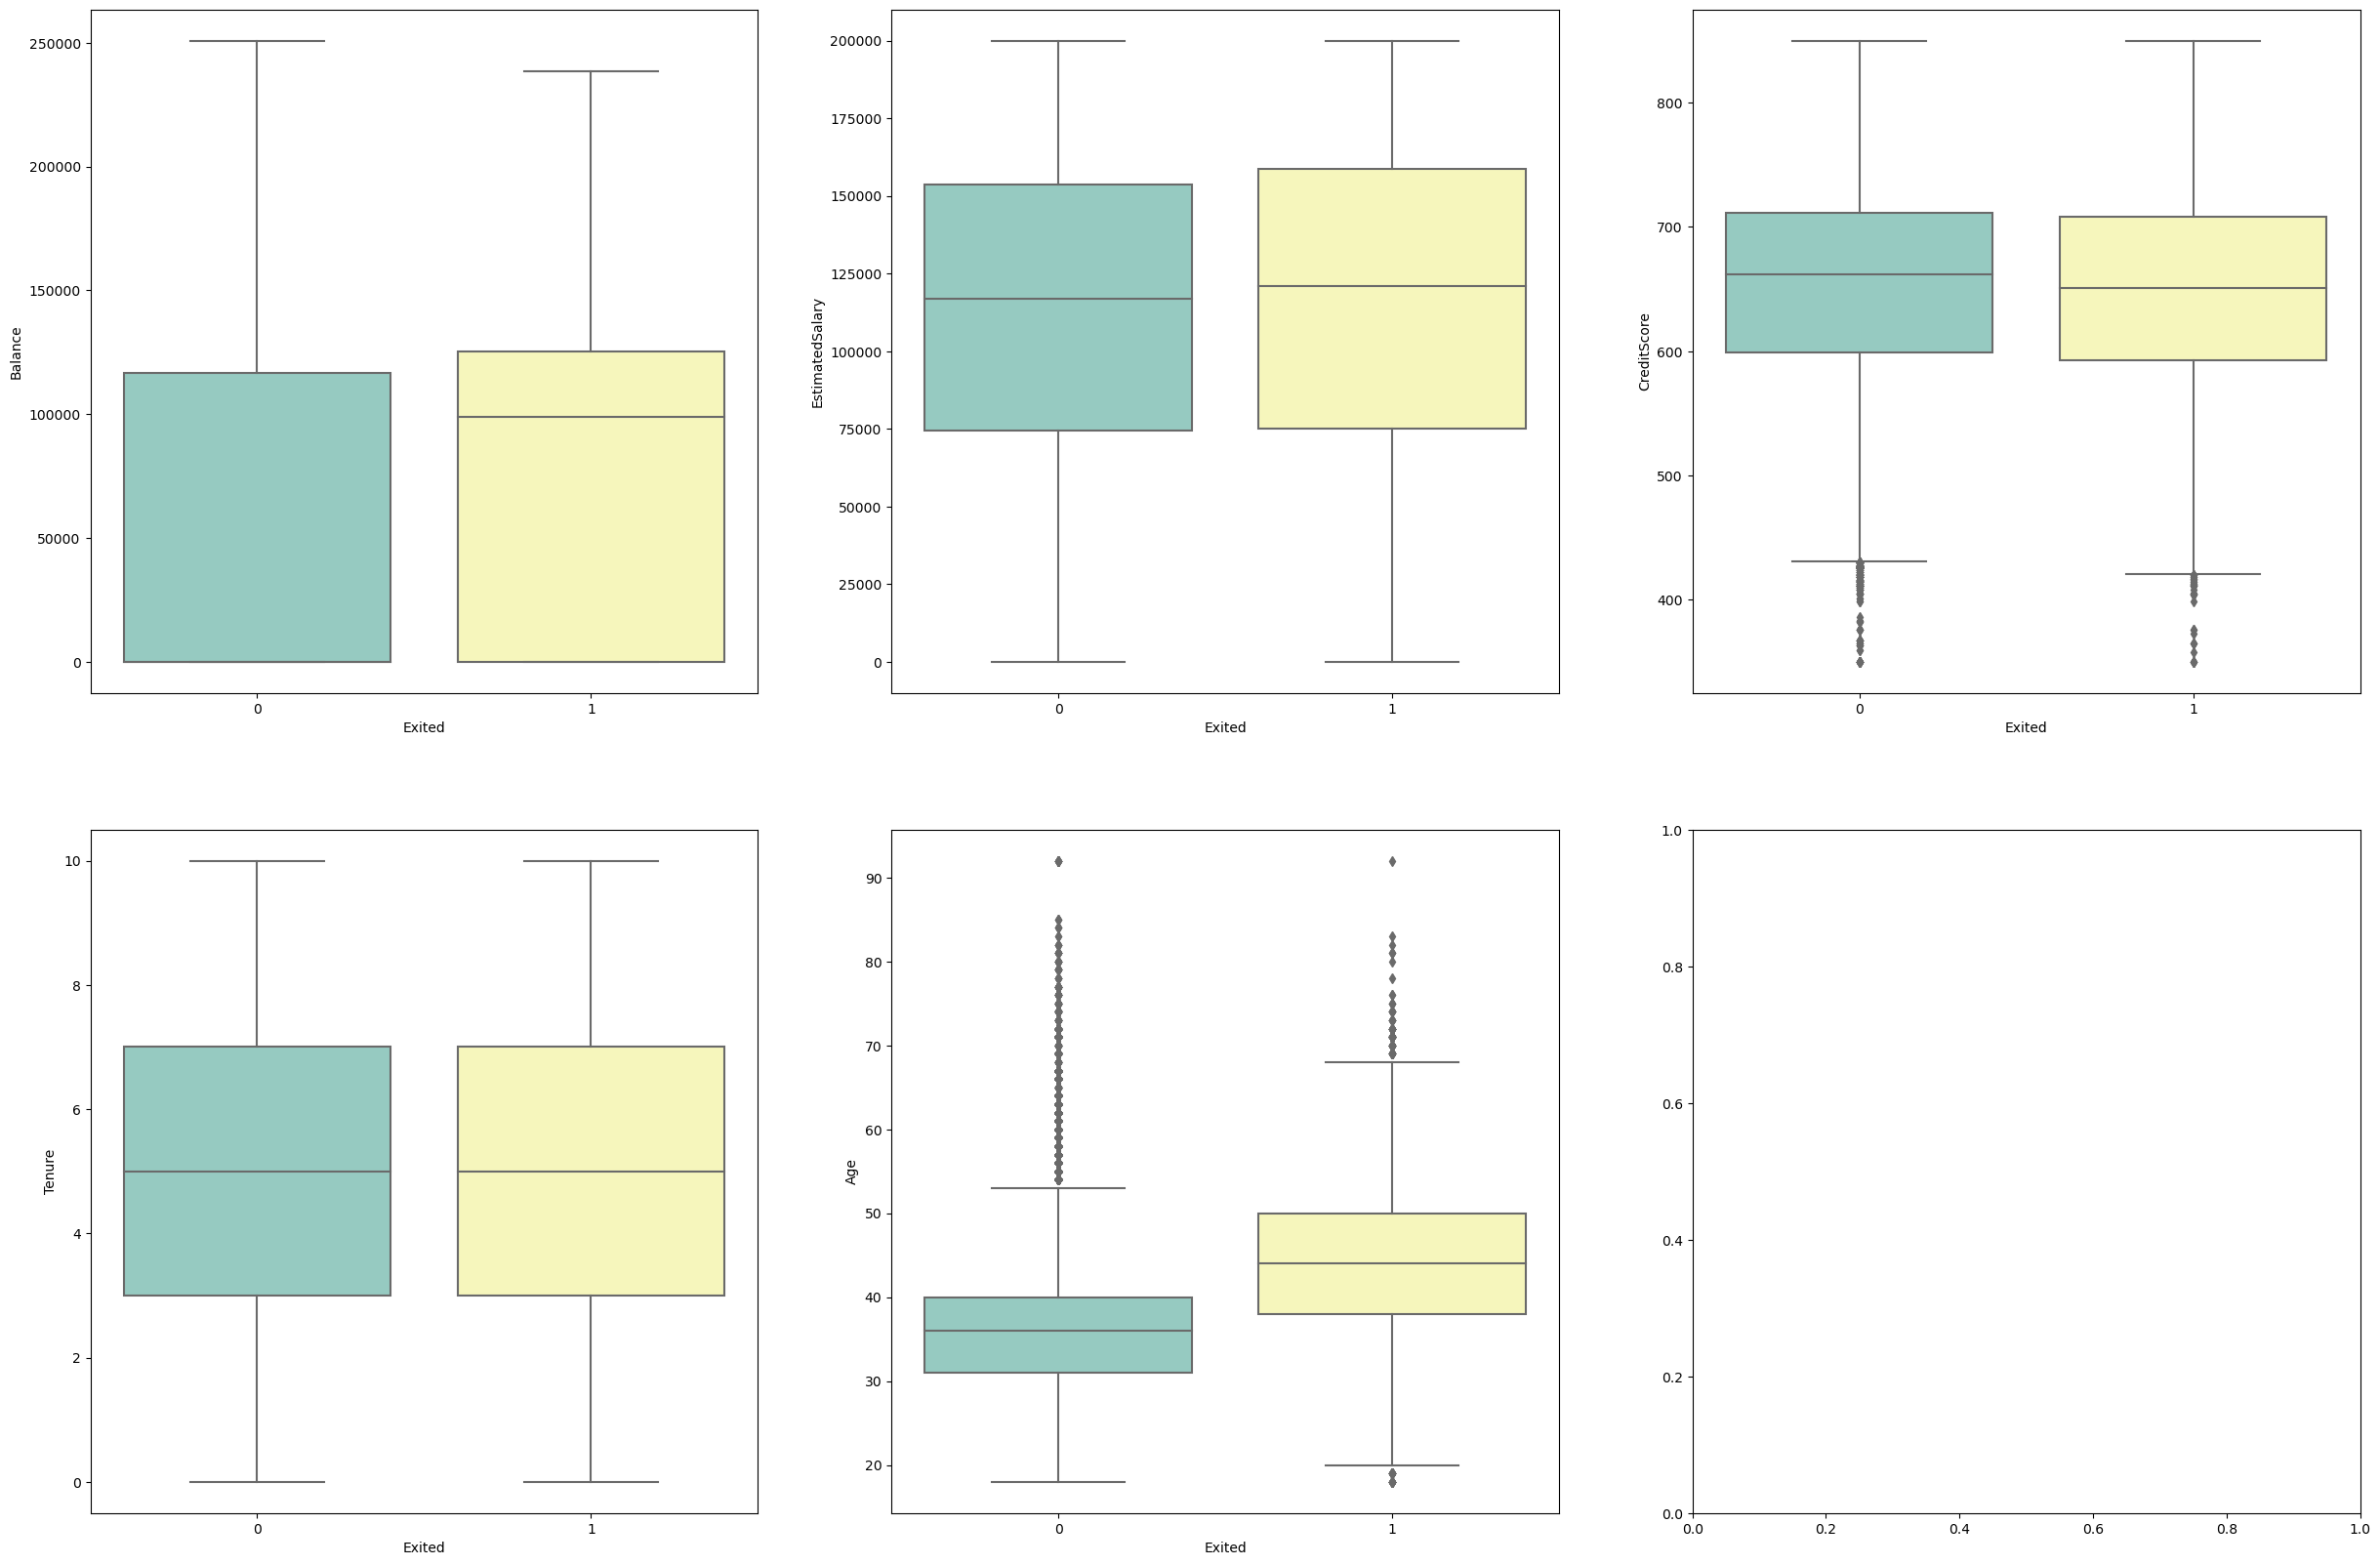

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
for var, subplot in zip(continuous_features_to_plot, ax.flatten()):
    sns.boxplot(x='Exited', y=var, data=training, ax=subplot, palette='Set3')

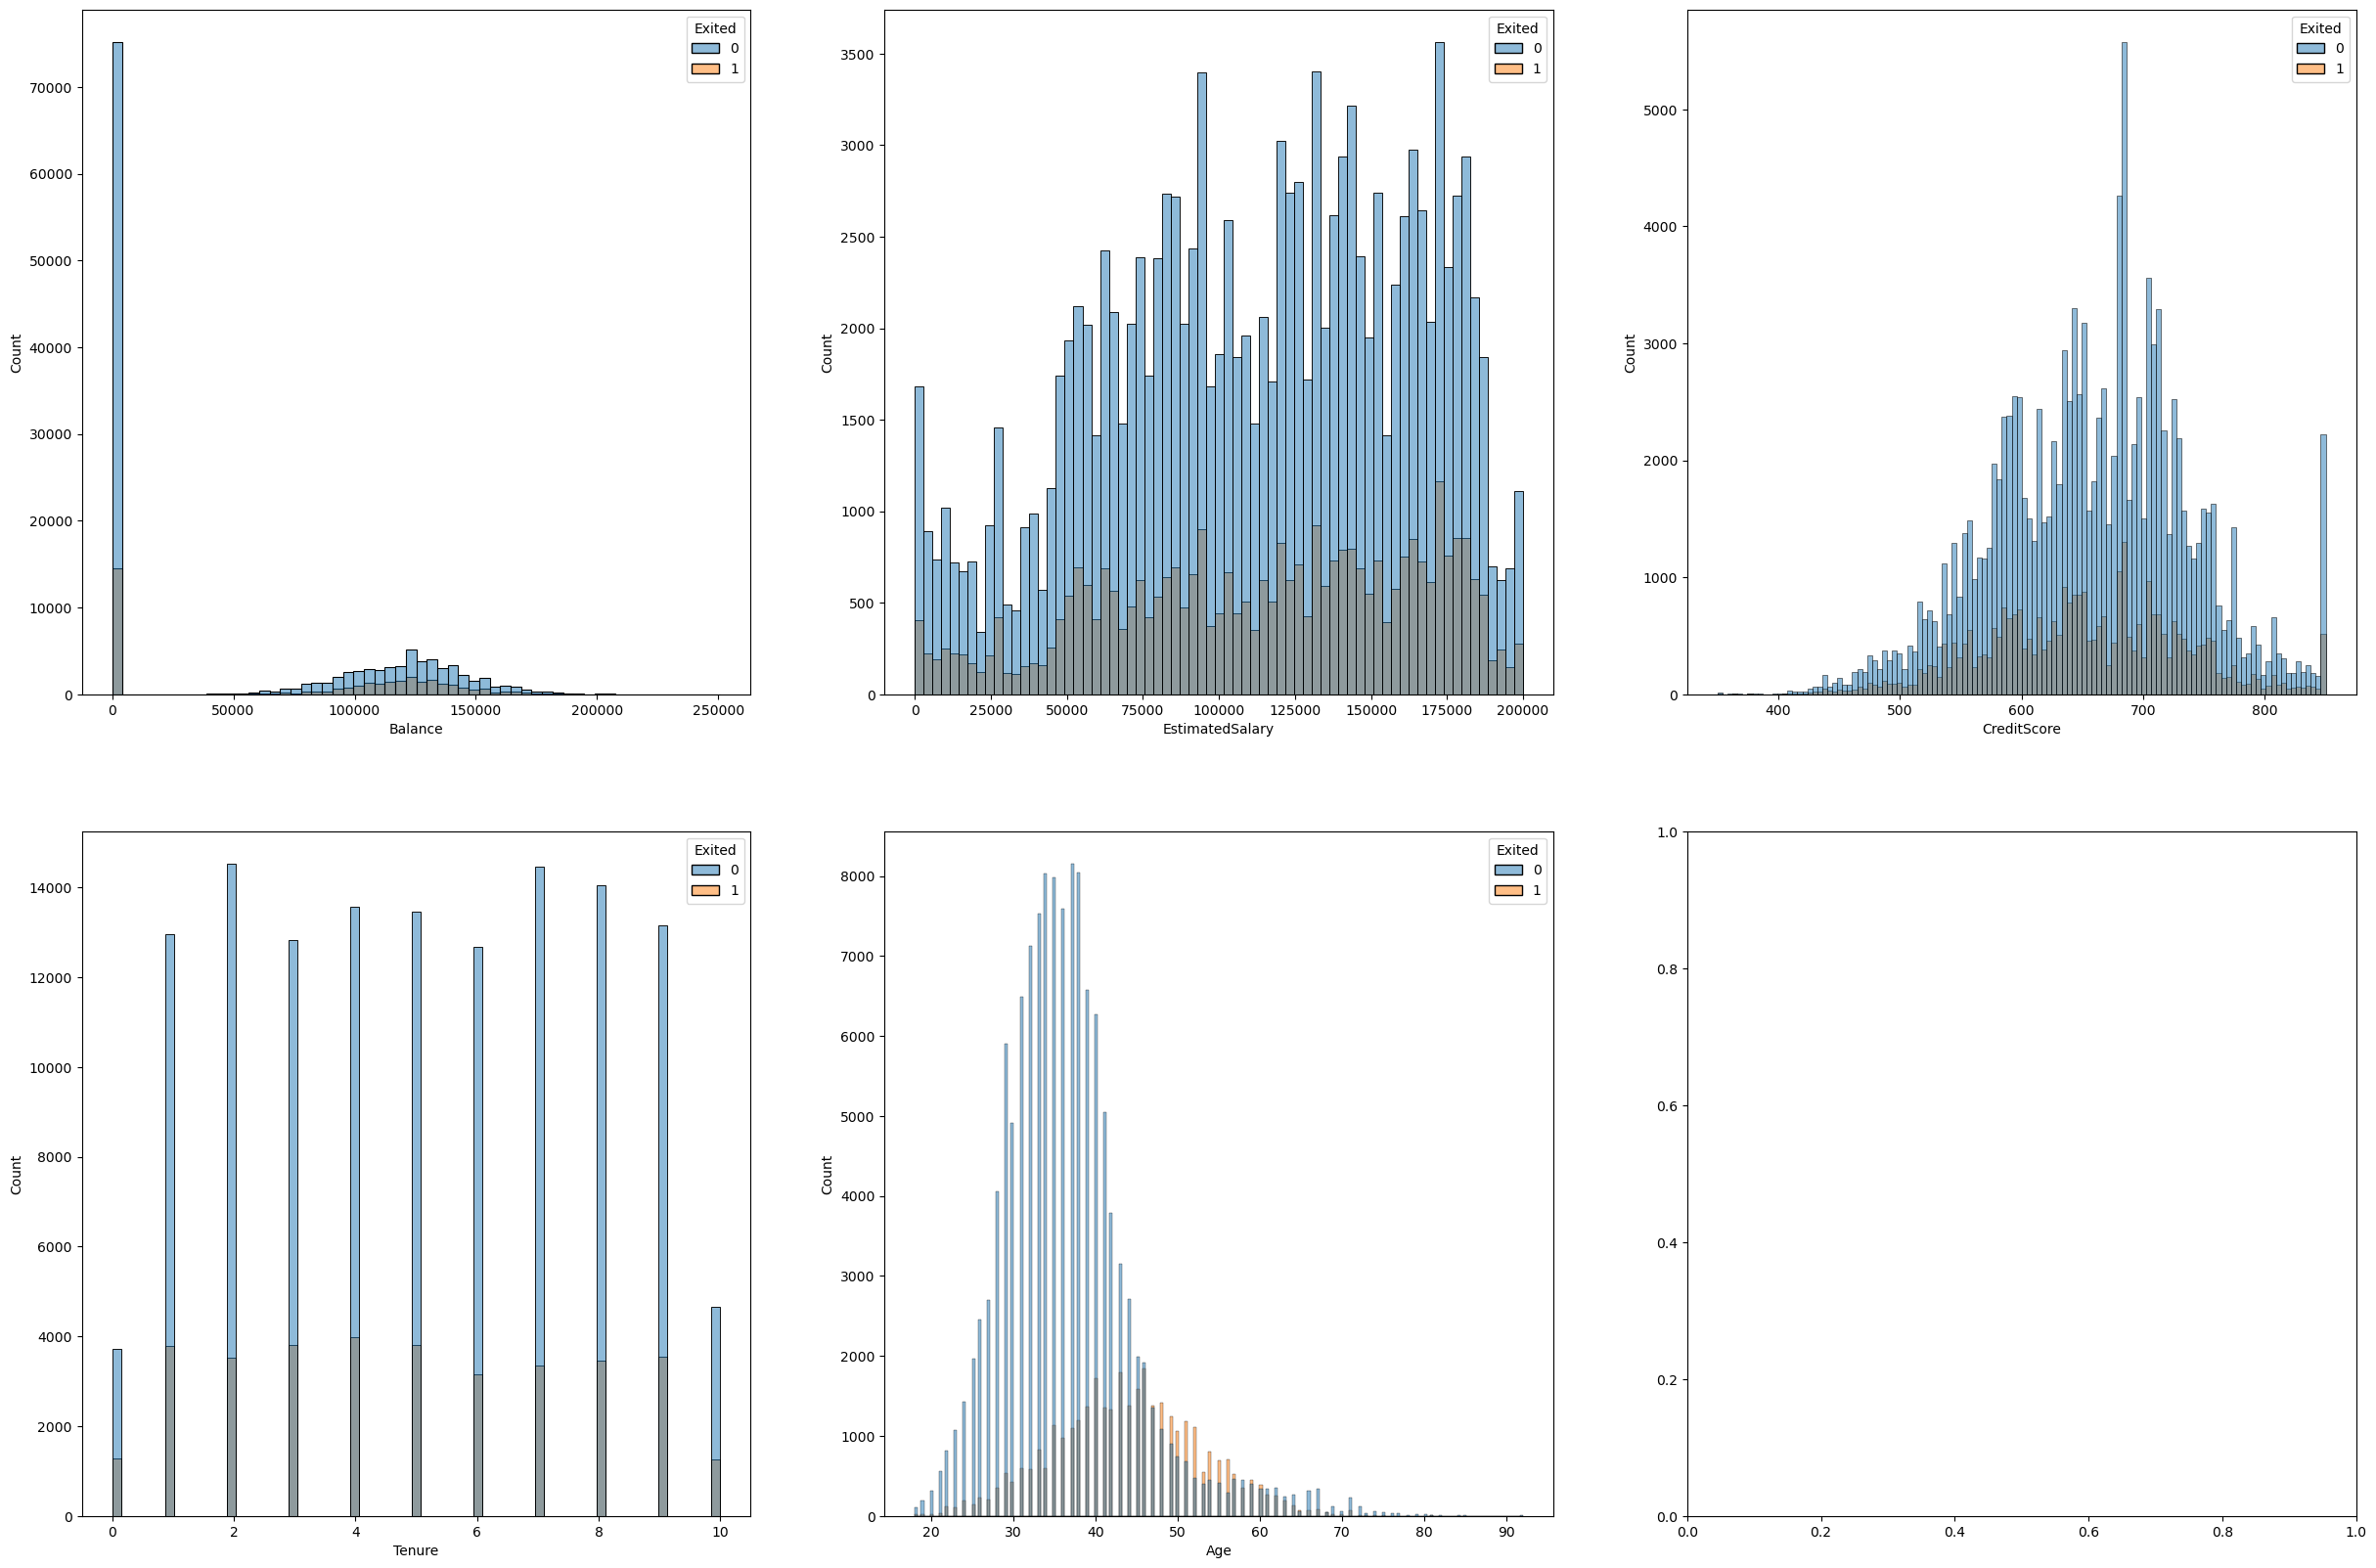

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(30, 20))
for var, subplot in zip(continuous_features_to_plot, ax.flatten()):
    sns.histplot(x=var,  data=training, ax=subplot, hue='Exited' )

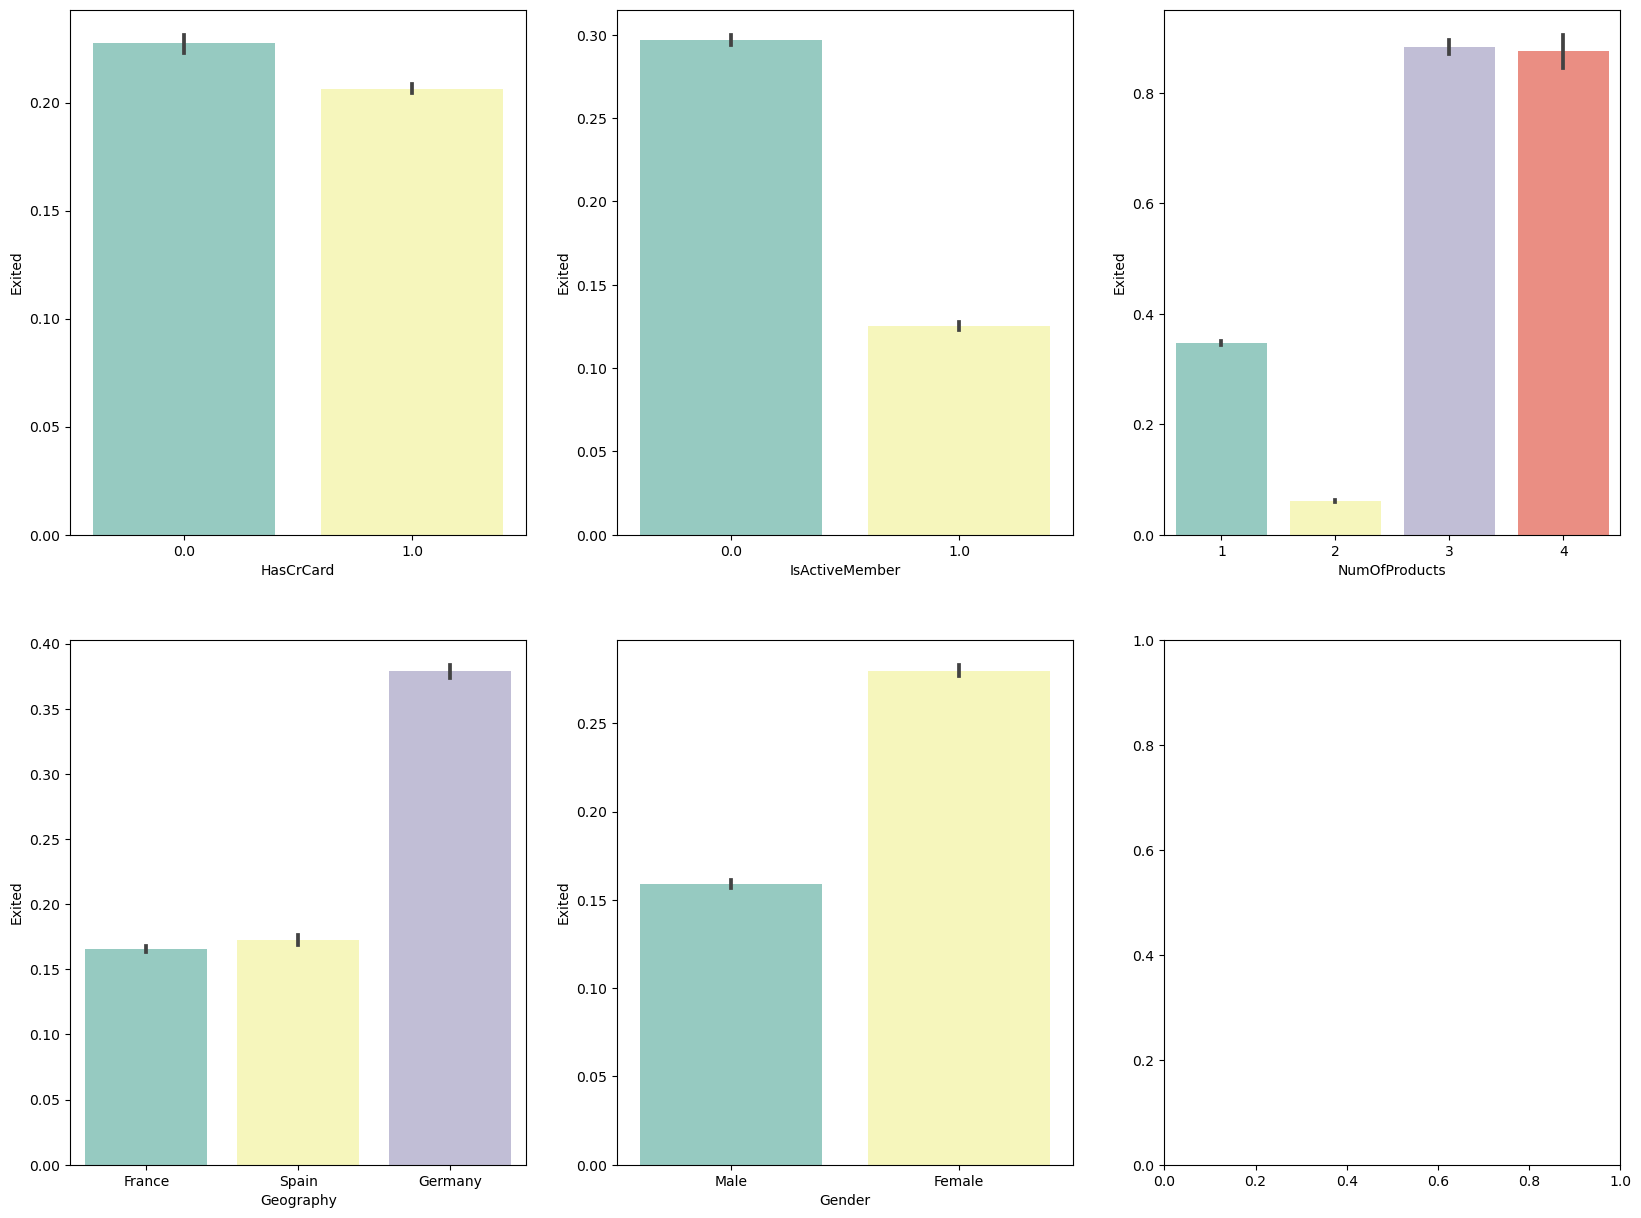

In [21]:
fig, ax = plt.subplots(2, 3, figsize=(20, 15))
for var, subplot in zip(discrete_features + categorical_features, ax.flatten()):
    sns.barplot(x=var, y= 'Exited', data=training, ax=subplot, palette='Set3')




*   female are more prone to churn
*   Germany is the most country to churn
*   People with less number of products more prone to churn
*   Nonactive members are more prone to churn



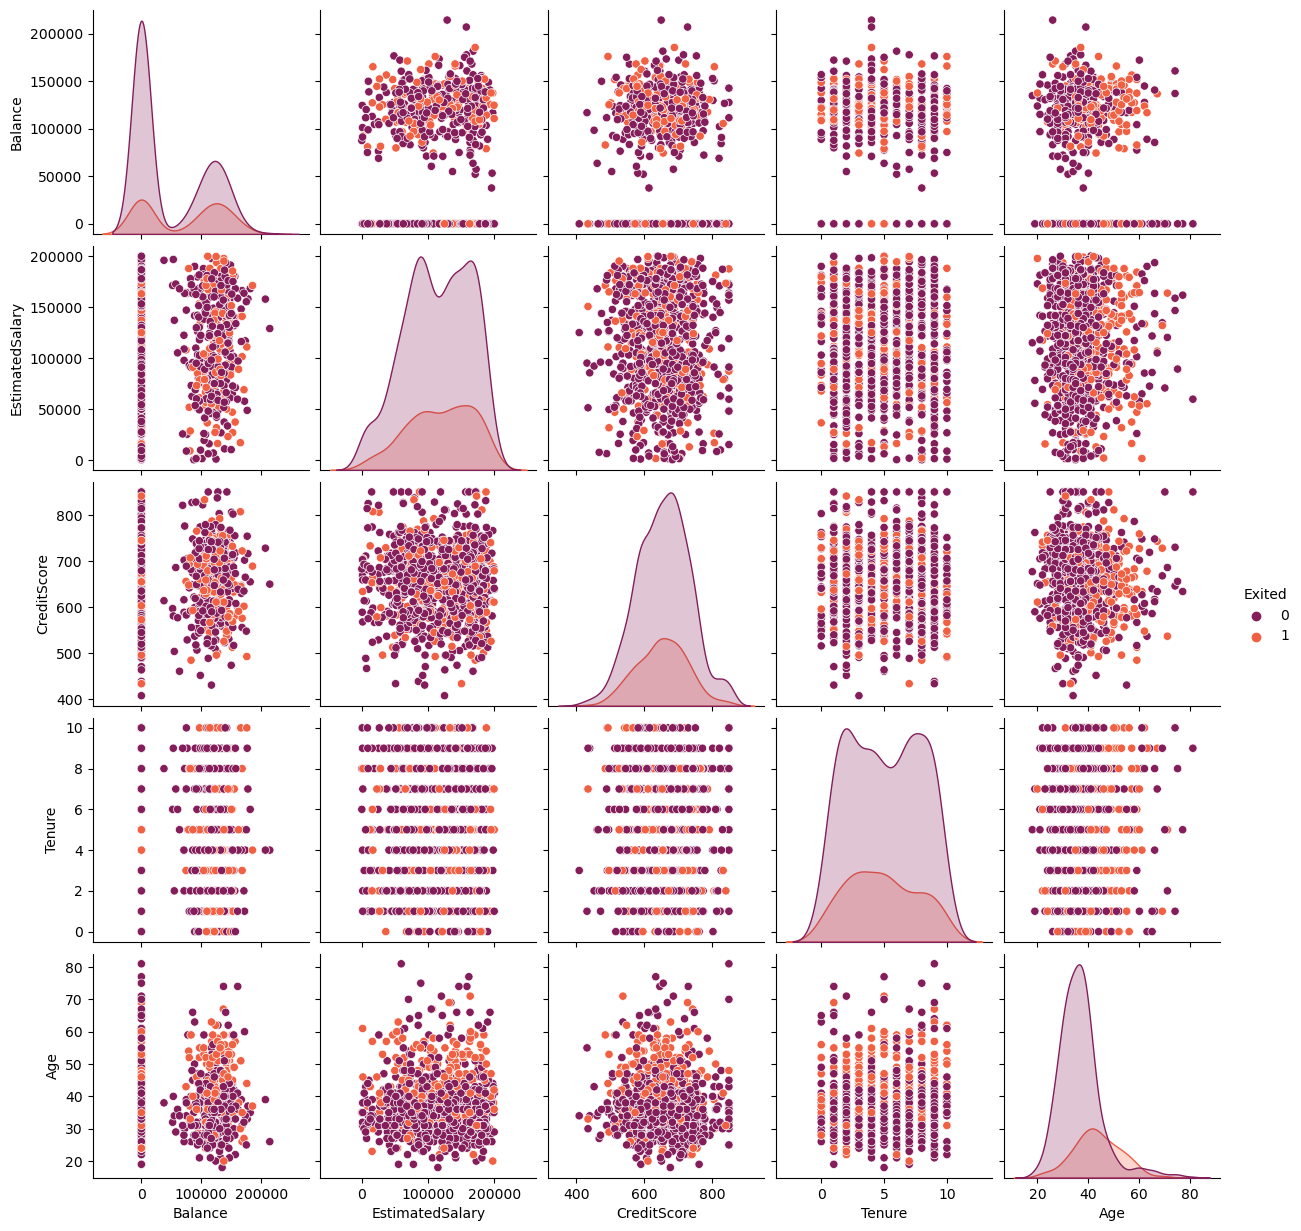

In [22]:
sns.pairplot(training[continuous_features_to_plot + ["Exited"]].sample(n = 1000), hue="Exited", palette='rocket')

* Again age seems like a good predictive feature

  ## Let's check mutual information, which measures this kind of relationship well

In [23]:
y = training.Exited
# determine the mutual information for numerical features
#You need to fill missing values to get results from mutual_info_classif function
mutual_df = training[numerical_features ]

mutual_info = mutual_info_classif(mutual_df, y)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df.columns
mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] )
mutual_info.style.background_gradient("cool")

,Numerical_Feature_MI
NumOfProducts,0.099962
Age,0.083265
IsActiveMember,0.042692
HasCrCard,0.025234
Balance,0.015573
EstimatedSalary,0.007693
CreditScore,0.003806
Tenure,0.003177


In [24]:
mutual_df_categorical = training[categorical_features + discrete_features]
#categorical features must be encoded to get mutual information
for colname in mutual_df_categorical:
    mutual_df_categorical[colname], _ = mutual_df_categorical[colname].factorize()
mutual_info = mutual_info_classif(mutual_df_categorical, y, random_state=1)

mutual_info = pd.Series(mutual_info)
mutual_info.index = mutual_df_categorical.columns
pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Categorical_Feature_MI"] ).style.background_gradient("cool")

,Categorical_Feature_MI
NumOfProducts,0.095596
IsActiveMember,0.042820
Geography,0.024521
Gender,0.022340
HasCrCard,0.003082


* We do not have a  meaningless feature. I will include all features in the modeling phase.

#preprocessing

In [25]:
numerical_transformer = Pipeline(steps=[

    ('scaler', StandardScaler()),
    ('MeanImputer', SimpleImputer(strategy="mean"))

])

In [26]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [27]:
#identify skewed features
skewnes = training_data[numerical_features].select_dtypes(exclude=['object']).skew().sort_values(ascending=False)
skewnes = pd.DataFrame({'Skew' : skewnes})
skewnes


,Skew
Age,0.968063
Balance,0.382020
NumOfProducts,0.368278
IsActiveMember,0.008920
Tenure,0.006490
CreditScore,-0.059291
EstimatedSalary,-0.309022
HasCrCard,-1.179255


In [28]:
#List them to preporocessing purpose
skewed_features = ['CreditScore', 'EstimatedSalary','HasCrCard']

In [29]:
#pipeline for skeweness
skewness_transformer = Pipeline(steps=[

    ('PowerTransformer', PowerTransformer( method='yeo-johnson', standardize=True))
])

In [30]:
preprocessor = ColumnTransformer(remainder='passthrough',
    transformers=[
        ('skewness_transformer', skewness_transformer, skewed_features),
        ('categorical_transformer', categorical_transformer, categorical_features),
        ('numerical_transformer', numerical_transformer, numerical_features)
    ])

preprocessor.__class__.__name__ = 'ColumnTransformer'  # Set the class name explicitly

preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('skewness_transformer',
                                 Pipeline(steps=[('PowerTransformer',
                                                  PowerTransformer())]),
                                 ['CreditScore', 'EstimatedSalary',
                                  'HasCrCard']),
                                ('categorical_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Geography', 'Gender']),
                                ('numerical_transformer',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('MeanImputer',
                                                  SimpleImputer())]),
                                 ['Age', 'Balance', 'CreditScore',
                                  'EstimatedSalary', 'HasCrCard',
                                  'IsActiveMember', 'NumOfProducts',
                                  'Tenure'])])

In [31]:
full_pipeline = Pipeline(steps=[

    ('preprocessor', preprocessor),
])

In [32]:
y = training['Exited']
x = training.drop(['Exited'], axis=1)

In [33]:
X_1=pd.DataFrame(full_pipeline .fit_transform(x,y))
X_1_test=pd.DataFrame(full_pipeline.transform(test_data.drop(['id', 'CustomerId', 'Surname'], axis=1)))

X_1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.135077,1.366240,0.571263,1.0,0.0,0.0,0.0,1.0,-0.578074,-0.883163,0.144135,1.369486,0.571263,-0.99555,0.814298,-0.719973
1,-0.376409,-1.253525,0.571263,1.0,0.0,0.0,0.0,1.0,-0.578074,-0.883163,-0.367706,-1.254085,0.571263,1.00447,0.814298,-1.432694
2,0.260575,1.433748,0.571263,1.0,0.0,0.0,0.0,1.0,0.211354,-0.883163,0.268974,1.437422,0.571263,-0.99555,0.814298,1.774548
3,-0.944170,-0.554259,0.571263,1.0,0.0,0.0,0.0,1.0,-0.465299,1.486918,-0.941966,-0.557018,0.571263,1.00447,-1.013348,-1.076334
4,0.740033,-1.945322,0.571263,0.0,0.0,1.0,0.0,1.0,-0.578074,-0.883163,0.743362,-1.938770,0.571263,1.00447,0.814298,-0.007253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.122544,0.384456,0.571263,0.0,0.0,1.0,1.0,0.0,-0.578074,-0.883163,0.131651,0.382957,0.571263,1.00447,-1.013348,-1.076334
165030,1.710561,0.384451,-1.750507,1.0,0.0,0.0,0.0,1.0,-0.352523,-0.883163,1.692140,0.382951,-1.750507,-0.99555,-1.013348,-0.719973
165031,-1.140066,0.297136,0.571263,1.0,0.0,0.0,0.0,1.0,-0.803625,-0.883163,-1.141708,0.295366,0.571263,1.00447,-1.013348,-0.007253
165032,-1.274253,-0.820899,-1.750507,0.0,0.0,1.0,1.0,0.0,-0.916401,1.688303,-1.279031,-0.823217,-1.750507,1.00447,-1.013348,0.705467


In [34]:
X_train,X_valid,y_train,y_valid=train_test_split(X_1,y,test_size=0.3,random_state=42)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  # Import CatBoostClassifier

# Define empty lists to store model metrics
model_name = []
accuracy = []
roc_auc = []
F1_score = []

# Define the list of models to be evaluated
models = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    LogisticRegression(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier(random_state=42),
    CatBoostClassifier(random_state=42)  # Add CatBoostClassifier to the list of models
]

# Iterate through each model, fit it on the training data, and evaluate its performance
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_valid)
    y_predict = model.predict_proba(X_valid)[:, 1]
    model_name.append(model.__class__.__name__)
    accuracy.append(accuracy_score(prediction, y_valid) * 100)
    roc_auc.append(roc_auc_score(y_valid, y_predict) * 100)
    F1_score.append(f1_score(y_valid, prediction) * 100)

# Create a DataFrame to store the model evaluation results
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "Accuracy": accuracy,
    "AUC": roc_auc,
    "F1-Score": F1_score
})

# Display the model evaluation results
models_df


[LightGBM] [Info] Number of positive: 24543, number of negative: 90980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 115523, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212451 -> initscore=-1.310213
[LightGBM] [Info] Start training from score -1.310213
Learning rate set to 0.078288
0:	learn: 0.6200269	total: 164ms	remaining: 2m 43s
1:	learn: 0.5663374	total: 184ms	remaining: 1m 31s
2:	learn: 0.5229715	total: 211ms	remaining: 1m 10s
3:	learn: 0.4879392	total: 231ms	remaining: 57.5s
4:	learn: 0.4577670	total: 253ms	remaining: 50.4s
5:	learn: 0.4351974	total: 275ms	remaining: 45.5s
6:	learn: 0.4162424	total: 297ms	remaining: 42.2s
7:	learn: 0.4017580	total: 319ms	remaining: 39.6s
8:	learn

,Model-Name,Accuracy,AUC,F1-Score
0,DecisionTreeClassifier,79.733797,70.236399,52.701046
1,RandomForestClassifier,85.847589,87.249941,61.336423
2,GradientBoostingClassifier,86.554503,88.870457,62.907450
3,LogisticRegression,83.528913,81.761420,49.539014
4,XGBClassifier,86.419180,88.668201,63.204553
5,LGBMClassifier,86.655491,88.940918,63.755554
6,CatBoostClassifier,86.667609,88.901519,63.552537


In [49]:
models_df = pd.DataFrame({"Model-Name":model_name, "Accuracy": accuracy ,'AUC':roc_auc ,'F1-Score':F1_score})
#models_df = models_df.drop(columns='Model-Name').columns.astype(float)

#models_df.sort_values("AUC", ascending = False)
models_df

,Model-Name,Accuracy,AUC,F1-Score
0,DecisionTreeClassifier,79.733797,70.236399,52.701046
1,RandomForestClassifier,85.847589,87.249941,61.336423
2,GradientBoostingClassifier,86.554503,88.870457,62.907450
3,LogisticRegression,83.528913,81.761420,49.539014
4,XGBClassifier,86.419180,88.668201,63.204553
5,LGBMClassifier,86.655491,88.940918,63.755554
6,CatBoostClassifier,86.667609,88.901519,63.552537


In [55]:
gbc=LGBMClassifier(random_state=42)



In [56]:
gbc.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 24543, number of negative: 90980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1378
[LightGBM] [Info] Number of data points in the train set: 115523, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.212451 -> initscore=-1.310213
[LightGBM] [Info] Start training from score -1.310213


LGBMClassifier(random_state=42)

In [57]:
y_pred_gbc = gbc.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_pred_gbc)
print("AUC score:", auc_score)

AUC score: 0.8894091819745893


In [58]:
X_sub = X_1_test
y_sub = gbc.predict_proba(X_sub)[:, 1]

# Generate id values starting from 165034
ids = np.arange(165034, 165034 + len(X_sub))

# Create DataFrame df_sub
df_sub = pd.DataFrame({'id': ids, 'Exited': y_sub})

# Show the first few rows of df_sub
df_sub.head()



,id,Exited
0,165034,0.029349
1,165035,0.828409
2,165036,0.030048
3,165037,0.221902
4,165038,0.344253


In [59]:

df_sub.to_csv('submission2.csv', index=False)
